# Notebook 2: Getting Started

This is a notebook to get started with

In [1]:
import numpy as np
import pandas as pd
import umap
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/GSE193309_full.csv", index_col=0)

In [3]:
df

,MIR6859-1,U6,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,LINC02593,SAMD11,NOC2L,...,EIF1AY,tissue,subject_id,skin type,gender,scorad,easi,visit_id,visit_date,anatomic_region
key_0,,,,,,,,,,,,,,,,,,,,,
01_AD_02_LS_01,7.867087,28.321513,67.656947,23.601260,413.808767,91.258207,0.000000,7.867087,3.146835,6093.845459,...,0.000000,skin,AD_02,LS,female,48.0,5.2,1,21.03.2018,arm
01_AD_04_LS_01,3.090018,15.450090,63.345369,9.270054,469.682733,61.800360,12.360072,6.180036,23.175135,4523.786323,...,0.000000,skin,AD_04,LS,female,67.6,22.3,1,10.04.2018,arm
01_AD_04_NL_02,8.106034,25.939310,92.408793,16.212069,518.786204,106.999655,1.621207,8.106034,12.969655,4920.362907,...,0.000000,skin,AD_04,NL,female,67.6,22.3,1,10.04.2018,arm
01_AD_05_LS_01,0.000000,8.086508,50.136348,9.703809,661.476337,58.222856,4.851905,0.000000,12.938412,6121.486394,...,0.000000,skin,AD_05,LS,female,28.9,1.4,1,10.04.2018,hand
01_AD_05_LS_02,0.000000,28.989989,79.722471,12.079162,596.710614,28.989989,7.247497,4.831665,9.663330,4106.915158,...,0.000000,skin,AD_05,LS,female,28.9,1.4,1,10.04.2018,hand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03_AD_22_NL_02,0.000000,33.068841,87.535167,1.945226,532.991905,93.370845,0.000000,48.630648,29.178389,5648.936106,...,0.000000,skin,AD_22,NL,male,23.2,1.8,3,21.01.2019,leg
03_CO_46_HC_02,7.265586,59.941084,141.678926,7.265586,973.588514,147.128115,0.000000,0.000000,34.511533,5877.859013,...,0.000000,skin,CO_46,HC,female,NaN,NaN,3,08.01.2019,arm
04_AD_12_LS_01,8.576086,54.886948,111.489113,48.026080,337.897774,44.595645,0.000000,0.000000,0.000000,4519.597129,...,0.000000,skin,AD_12,LS,female,16.3,1.6,4,03.04.2019,leg


In [87]:
df_genes = df.iloc[:, :-9] # the genes
df_genes

,MIR6859-1,U6,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,LINC02593,SAMD11,NOC2L,...,USP9Y,DDX3Y,UTY,TMSB4Y,NLGN4Y,FAM224B,TTTY14,KDM5D,TTTY10,EIF1AY
key_0,,,,,,,,,,,,,,,,,,,,,
01_AD_02_LS_01,7.867087,28.321513,67.656947,23.601260,413.808767,91.258207,0.000000,7.867087,3.146835,6093.845459,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.573417,0.000000,0.000000,0.000000
01_AD_04_LS_01,3.090018,15.450090,63.345369,9.270054,469.682733,61.800360,12.360072,6.180036,23.175135,4523.786323,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01_AD_04_NL_02,8.106034,25.939310,92.408793,16.212069,518.786204,106.999655,1.621207,8.106034,12.969655,4920.362907,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.621207,0.000000,0.000000,0.000000
01_AD_05_LS_01,0.000000,8.086508,50.136348,9.703809,661.476337,58.222856,4.851905,0.000000,12.938412,6121.486394,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01_AD_05_LS_02,0.000000,28.989989,79.722471,12.079162,596.710614,28.989989,7.247497,4.831665,9.663330,4106.915158,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.247497,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03_AD_22_NL_02,0.000000,33.068841,87.535167,1.945226,532.991905,93.370845,0.000000,48.630648,29.178389,5648.936106,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.890452,1.945226,0.000000,0.000000
03_CO_46_HC_02,7.265586,59.941084,141.678926,7.265586,973.588514,147.128115,0.000000,0.000000,34.511533,5877.859013,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04_AD_12_LS_01,8.576086,54.886948,111.489113,48.026080,337.897774,44.595645,0.000000,0.000000,0.000000,4519.597129,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [88]:
df_meta = df.iloc[:, -9:] # info that describes/provides more info on the data (aka genes)
df_meta

,tissue,subject_id,skin type,gender,scorad,easi,visit_id,visit_date,anatomic_region
key_0,,,,,,,,,
01_AD_02_LS_01,skin,AD_02,LS,female,48.0,5.2,1,21.03.2018,arm
01_AD_04_LS_01,skin,AD_04,LS,female,67.6,22.3,1,10.04.2018,arm
01_AD_04_NL_02,skin,AD_04,NL,female,67.6,22.3,1,10.04.2018,arm
01_AD_05_LS_01,skin,AD_05,LS,female,28.9,1.4,1,10.04.2018,hand
01_AD_05_LS_02,skin,AD_05,LS,female,28.9,1.4,1,10.04.2018,hand
...,...,...,...,...,...,...,...,...,...
03_AD_22_NL_02,skin,AD_22,NL,male,23.2,1.8,3,21.01.2019,leg
03_CO_46_HC_02,skin,CO_46,HC,female,NaN,NaN,3,08.01.2019,arm
04_AD_12_LS_01,skin,AD_12,LS,female,16.3,1.6,4,03.04.2019,leg


In [89]:
df_genes.shape

(339, 18304)

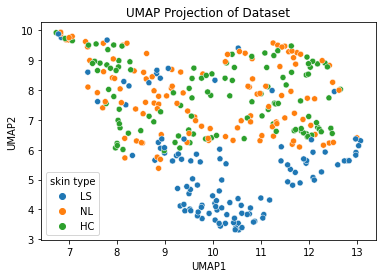

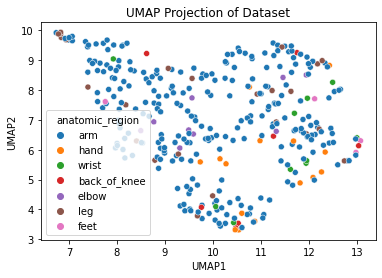

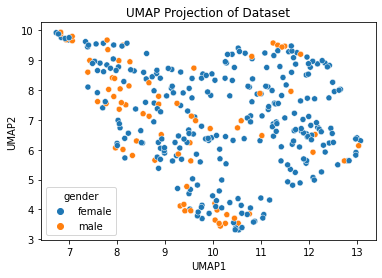

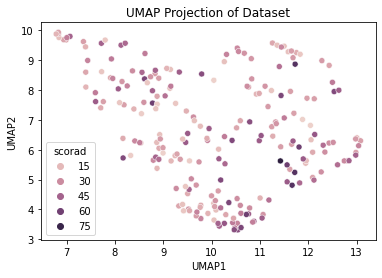

In [90]:
# Data Visualization
# UMAP—Uniform Manifold Approximation and Projection:

reducer = umap.UMAP (n_neighbors=20).fit (df_genes.values)
embedding = reducer.transform(df_genes)
umap1 = embedding[:,0]
umap2 = embedding[:,1]
color = df_meta['skin type']
sns.scatterplot(x=umap1, y=umap2, hue=color)
plt.title('UMAP Projection of Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()
sns.scatterplot(x=umap1, y=umap2, hue=df_meta['anatomic_region'])
plt.title('UMAP Projection of Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()
sns.scatterplot (x=umap1, y=umap2, hue=df_meta['gender'])
plt.title('UMAP Projection of Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()
sns.scatterplot (x=umap1, y=umap2, hue=df_meta['scorad'])
plt.title('UMAP Projection of Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.show()

In [91]:
# # build a binary classfication model of AD vs HC
# # df_meta

# # create a column "AD" that specifies whether patient has AD
# # one-hot encode -  1 = AD, 0 = HC

# df_meta["AD"] = df_meta["subject_id"].str.contains("AD")
# df_meta["AD"] = df_meta["AD"].replace(True, 1)
# df_meta["AD"] = df_meta["AD"].replace(False, 0)
# df_meta

In [92]:
# Create a classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# clf = GaussianNB()

# #Split your dataset into 80% training, 20% test
# X_train, X_test, y_train, y_test = train_test_split(df_genes.values, df_meta["AD"].values, test_size=0.20)

# #Fit your classfier to training data
# clf.fit(X_train, y_train)

# #Predict test data
# y_pred = clf.predict(X_test)
# y_pred
# print(clf.score(X_test, y_test))

# nb_cm = confusion_matrix(y_test,y_pred)
# nb_cm_df = pd.DataFrame(
#     nb_cm, 
#     index = [idx for idx in ['AD', 'HC']],
#     columns = [col for col in ['AD (pred)', 'HC (pred)']])
# plt.figure(figsize = (10,7))
# sns.heatmap(nb_cm_df, annot=True)
# plt.show()

In [148]:
# Within the AD patients, can we classify samples as being LS or NL

# Create a column "AD" that specifies whether patient has AD
# One-hot encode - 1=AD, 0=HC
df_meta["AD"] = [1 if "AD" in s else 0 for s in df_meta["subject_id"]]

# Get metadata from only samples that are AD
df_meta_AD = df_meta[df_meta["AD"] == 1]
df_meta_AD

# Get gene data only from samples that are AD
df_genes_AD = df_genes.loc[df_meta_AD.index]
df_genes_AD

# Create a classifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
# clf_AD = GaussianProcessClassifier(kernel=1.0 * RBF(1.0), random_state=0
clf_AD = LogisticRegression(max_iter=10000)

# Split your dataset into 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(df_genes_AD. values, df_meta_AD["skin type"].values, test_size=0.2)

# Fit your classier to training data
clf_AD.fit(X_train, y_train)

# Predict test data
y_pred = clf_AD.predict(X_test)
y_pred

array(['NL', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS',
       'NL', 'NL', 'NL', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'NL', 'LS',
       'NL', 'LS', 'LS', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS', 'LS',
       'NL', 'LS', 'NL', 'LS', 'LS', 'NL', 'NL', 'LS', 'NL', 'NL', 'NL',
       'NL', 'LS'], dtype=object)

In [149]:
y_pred

array(['NL', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS',
       'NL', 'NL', 'NL', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'NL', 'LS',
       'NL', 'LS', 'LS', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS', 'LS',
       'NL', 'LS', 'NL', 'LS', 'LS', 'NL', 'NL', 'LS', 'NL', 'NL', 'NL',
       'NL', 'LS'], dtype=object)

In [123]:
y_test

array(['NL', 'LS', 'LS', 'NL', 'LS', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS',
       'NL', 'NL', 'NL', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'NL', 'LS',
       'NL', 'LS', 'LS', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS', 'LS',
       'NL', 'LS', 'NL', 'LS', 'NL', 'NL', 'NL', 'LS', 'NL', 'LS', 'NL',
       'NL', 'LS'], dtype=object)

In [124]:
acc = np.sum(y_pred == y_test) / len(y_pred)
acc

0.5652173913043478

In [125]:
X_test

array([[6.26917375e+00, 3.60477491e+01, 7.67973785e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.69142368e+00, 1.52228131e+01, 5.75084052e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.23780364e+00, 7.42682182e+00, 1.73292509e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.87082641e+01, 8.73052322e+01, 2.80623961e+02, ...,
        2.55367804e+03, 2.43207433e+02, 9.79065819e+02],
       [1.61504279e+00, 2.42256418e+01, 1.42123765e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.32970646e+00, 1.24396086e+01, 9.48520157e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [126]:
acc = np.sum(y_pred == y_test) / len(y_pred)
acc

0.5652173913043478

In [127]:
y_test

array(['NL', 'LS', 'LS', 'NL', 'LS', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS',
       'NL', 'NL', 'NL', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'NL', 'LS',
       'NL', 'LS', 'LS', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'LS', 'LS',
       'NL', 'LS', 'NL', 'LS', 'NL', 'NL', 'NL', 'LS', 'NL', 'LS', 'NL',
       'NL', 'LS'], dtype=object)

In [128]:
y_pred

array(['LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS',
       'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS',
       'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS',
       'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS', 'LS',
       'LS', 'LS'], dtype='<U2')

In [129]:
FP = 0
TP = 0
FN = 0
TN = 0

for pred, truth in zip(y_pred, y_test):
    if pred == "NL" and truth == "NL":
        TN += 1
    elif pred == "LS" and truth == "NL":
        FP += 1
    elif pred == "NL" and truth == "LS":
        FN += 1
    elif pred == "LS" and truth == "LS":
        TP += 1
(TP, FP, TN, FN)

(26, 20, 0, 0)

In [130]:
acc = (TP) / (TP + TN + FN + FP)
acc

0.5652173913043478

In [131]:
FPR = (FP) / (FP + TN)
print (FPR)
TPR = (TP) / (TP + FN)
print (TPR)

1.0
1.0


In [132]:
# Create a classifier

# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(max_iter=10000, random_state=0)

In [133]:
# Split your dataset into 80% training, 20% test

df_meta["AD"] = [1 if "AD" in s else 0 for s in df_meta["subject_id"]]

# Get metadata from only samples that are AD 
df_meta_AD = df_meta[df_meta ["AD"] == 1] 

# Get gene data only from samples that are AD 
df_genes_AD = df_genes.loc[df_meta_AD.index]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_genes_AD)

transformed = scaler.transform(df_genes_AD)

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(transformed, df_meta_AD["skin type"].values, test_size=0.2)

#Fit your classfier to training data

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array(['NL', 'LS', 'LS', 'LS', 'NL', 'NL', 'NL', 'NL', 'LS', 'LS', 'LS',
       'LS', 'NL', 'LS', 'LS', 'LS', 'LS', 'NL', 'NL', 'LS', 'NL', 'NL',
       'LS', 'NL', 'LS', 'NL', 'LS', 'LS', 'NL', 'NL', 'LS', 'NL', 'LS',
       'LS', 'NL', 'NL', 'NL', 'LS', 'LS', 'NL', 'NL', 'LS', 'NL', 'LS',
       'NL', 'LS'], dtype=object)

In [134]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
def plot_roc_curve(y_true: np.ndarray, y_score: np.ndarray):
    """
    This function plots the Reciever Operator Characteristic Curve for binary classification only.
    
    Parameters
    ----------
    y_true : np.array
        The ground truth
    y_score : np.array
        The probability array of shape (n_samples, n_classes)
    
    Returns
    -------
    None
    """
    fpr, tpr, _ = roc_curve(y_true, y_score[:,1])
    auc_roc = auc(fpr, tpr)
    label=f"ROC curve (area = {auc_roc})"
    fig = plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color="orange", label=label)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    plt.legend(loc="lower right")
    plt.show()

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0]


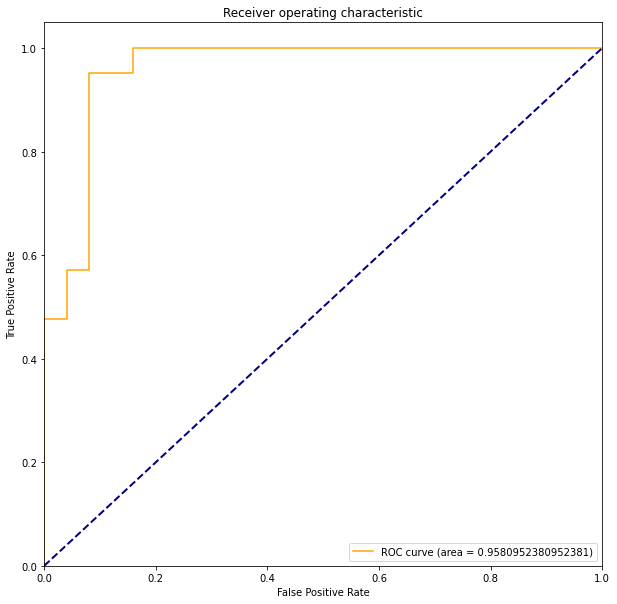

In [135]:
y_score = clf.predict_proba(X_test)
y_true = y_test

# NL - 1, LS - 0

label_dict = {'NL': 1, 'LS' : 0}

y_test_int = [label_dict[label] for label in y_test]

y_true = y_test_int
    
print(y_test_int)

plot_roc_curve(y_true, y_score)
    

C:\Users\Alt\AppData\Local\Temp\ipykernel_10636\3903768363.py:23: RuntimeWarning: Mean of empty slice.
  X[y == label, 0].mean(),
C:\working\apps\anacondaStuff\install\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Alt\AppData\Local\Temp\ipykernel_10636\3903768363.py:24: RuntimeWarning: Mean of empty slice.
  X[y == label, 1].mean() + 1.5,
C:\Users\Alt\AppData\Local\Temp\ipykernel_10636\3903768363.py:25: RuntimeWarning: Mean of empty slice.
  X[y == label, 2].mean(),
C:\Users\Alt\AppData\Local\Temp\ipykernel_10636\3903768363.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_zaxis.set_ticklabels([1])
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


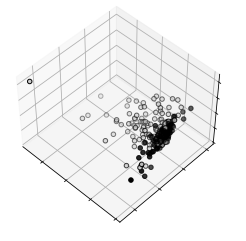

In [136]:
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

fig = plt.figure(1, figsize=(4, 3)) # canvas size

plt.clf() # clear figure

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla() # clear axis

pca = decomposition.PCA(n_components=3)
pca.fit(df_genes_AD)
X = pca.transform(df_genes_AD)

y = df_meta_AD["skin type"]

for name, label in [("NL", 0), ("LS", 1), ("NA", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center", 
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
          
# Reorder the labels to have colors matching the cluster results

y = [1 if "LS" in s else 0 for s in df_meta_AD["skin type"]]

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")
          
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([1])
        
plt.show()


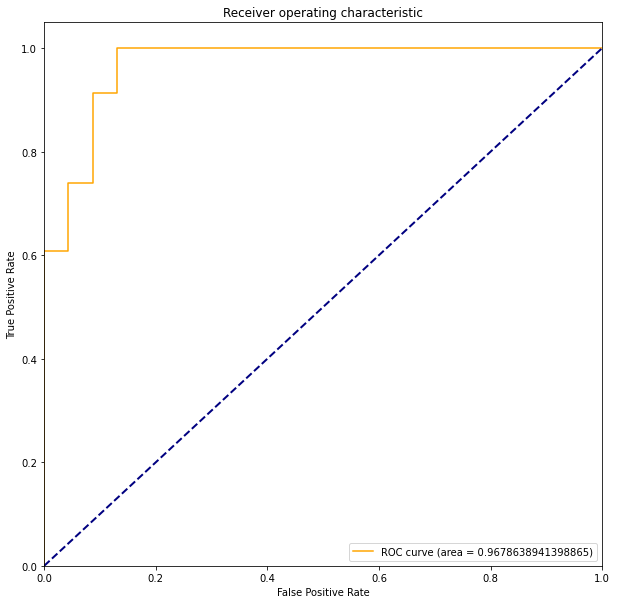

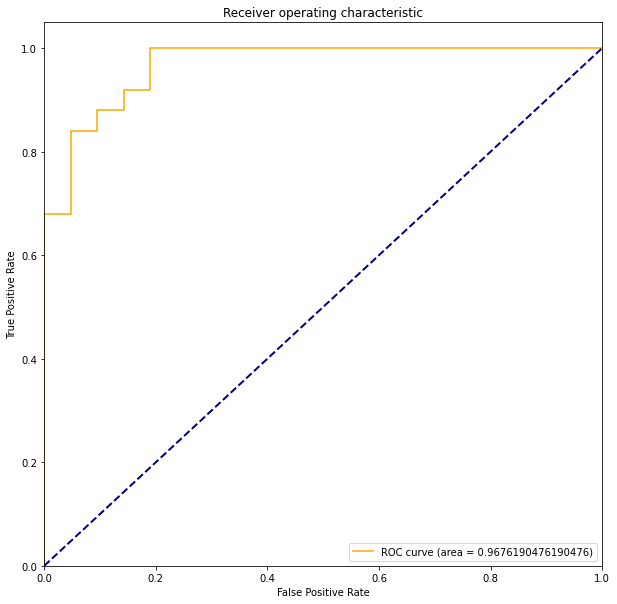

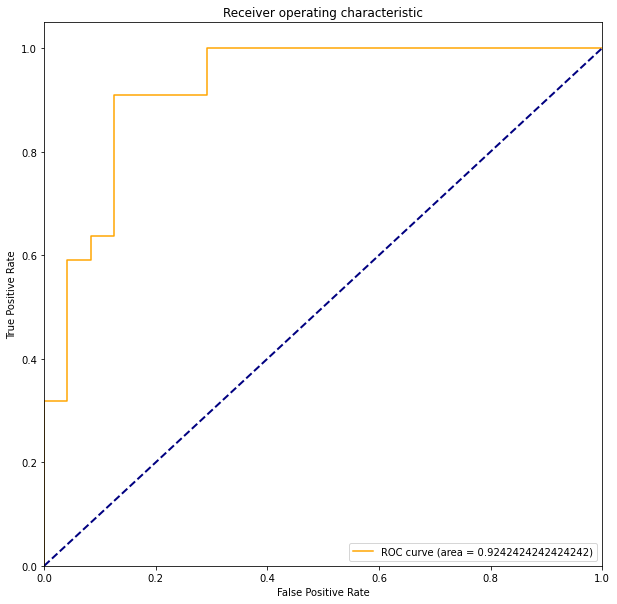

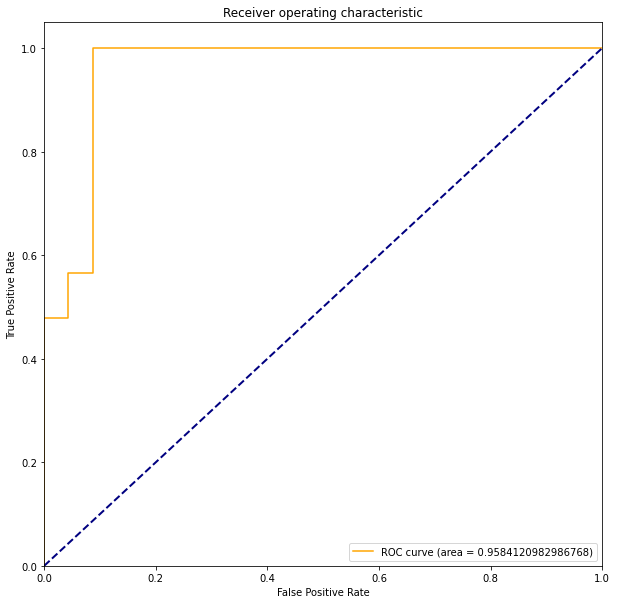

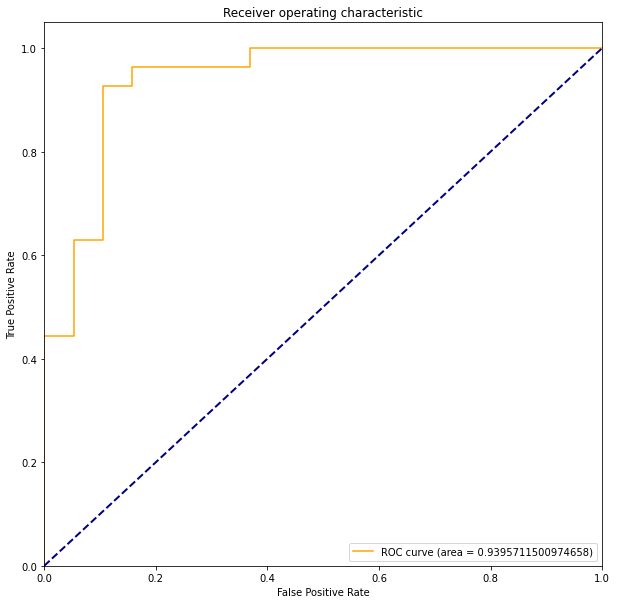

In [137]:
# for rand_state in np.random.randint(0, 200, 1): # randint(from, to, how many times) (??) why do we need a range for the random int?
for rand_state in np.random.randint(0, 200, 5):
    X_train, X_test, y_train, y_test = train_test_split(transformed, df_meta_AD["skin type"].values, test_size=0.2)
    n_comp = 10
    pca = decomposition.PCA(n_components=n_comp)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    clf = LogisticRegression(random_state=12, max_iter=10000).fit(X_train_pca, y_train)
    y_score = clf.predict_proba(X_test_pca)
    y_pred = clf.predict(X_test_pca)

    label_map = {"LS": 0, "NL": 1}
    y_test_int = [label_map[label] for label in y_test]
    
    plot_roc_curve(y_test_int, y_score)

    es_pca = clf.coef_.ravel()
    pca_names = [f'PCA {x}' for x in range(1, n_comp+1)]
    es_df_pca = pd.DataFrame({'feat_name': pca_names, 'effect_size': es_pca})
    es_df_pca = es_df_pca.sort_values('effect_size')
    es_df_pca

In [140]:
print(scaler.data_min_)
print(scaler.transform(df_genes))

[0. 0. 0. ... 0. 0. 0.]
[[0.29828449 0.12917913 0.10665508 ... 0.         0.         0.        ]
 [0.11715956 0.07047043 0.09985826 ... 0.         0.         0.        ]
 [0.30734431 0.11831351 0.14567413 ... 0.         0.         0.        ]
 ...
 [0.32516653 0.25034851 0.17575253 ... 0.         0.         0.        ]
 [0.49404508 0.         0.29050669 ... 0.78116088 1.         0.62665505]
 [0.         0.08631821 0.1670643  ... 0.48290154 0.05693282 0.41909818]]


In [142]:
# Minmax scaling
transformed.max(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [143]:
transformed.min(axis=0)

array([0., 0., 0., ..., 0., 0., 0.])

In [144]:
df_genes / df_genes.max(axis=0)

,MIR6859-1,U6,LINC01409,FAM87B,LINC01128,LINC00115,FAM41C,LINC02593,SAMD11,NOC2L,...,USP9Y,DDX3Y,UTY,TMSB4Y,NLGN4Y,FAM224B,TTTY14,KDM5D,TTTY10,EIF1AY
key_0,,,,,,,,,,,,,,,,,,,,,
01_AD_02_LS_01,0.226973,0.129179,0.106655,0.154203,0.147430,0.082543,0.000000,0.019921,0.003442,0.259153,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000385,0.000000,0.000000,0.000000
01_AD_04_LS_01,0.089150,0.070470,0.099858,0.060568,0.167336,0.055899,0.120749,0.015649,0.025349,0.192383,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01_AD_04_NL_02,0.233867,0.118314,0.145674,0.105925,0.184830,0.096781,0.015838,0.020526,0.014186,0.209248,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000397,0.000000,0.000000,0.000000
01_AD_05_LS_01,0.000000,0.036884,0.079035,0.063402,0.235667,0.052663,0.047400,0.000000,0.014152,0.260329,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
01_AD_05_LS_02,0.000000,0.132228,0.125675,0.078921,0.212593,0.026221,0.070803,0.012235,0.010570,0.174655,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001773,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
03_AD_22_NL_02,0.000000,0.150832,0.137991,0.012710,0.189892,0.084454,0.000000,0.123143,0.031916,0.240233,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000952,0.000632,0.000000,0.000000
03_CO_46_HC_02,0.209619,0.273401,0.223344,0.047471,0.346865,0.133078,0.000000,0.000000,0.037749,0.249968,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04_AD_12_LS_01,0.247428,0.250349,0.175753,0.313787,0.120384,0.040337,0.000000,0.000000,0.000000,0.192205,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [158]:
clf.coef_

array([[ 0.93348545, -0.81097674, -0.32779078,  0.19652775, -0.34281132,
         0.01739105, -0.04142947, -0.5295118 ,  0.41404279,  0.26325566]])

In [151]:
importance = clf.coef_[0]
importance


array([ 0.93348545, -0.81097674, -0.32779078,  0.19652775, -0.34281132,
        0.01739105, -0.04142947, -0.5295118 ,  0.41404279,  0.26325566])

C:\Users\Alt\AppData\Local\Temp\ipykernel_10636\2555743020.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_importance_10 = df_importance.iloc[:10].append(df_importance.iloc[-10:])


Text(0.5, 0, 'feature importance')

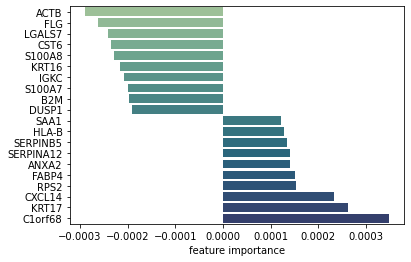

In [160]:
# get feature importance
df_importance = pd.DataFrame(clf_AD.coef_[0], df_genes.columns).sort_values(0)
df_importance_10 = df_importance.iloc[:10].append(df_importance.iloc[-10:]) 
#new_df = pd.concat([df_importance.iloc[:10], df_importance.iloc[-10:])
# plot feature importance
ax = sns.barplot (y=df_importance_10.index, x=df_importance_10[0], palette="crest")
ax.set_xlabel("feature importance")